# Analysis for training A2C on CartPole-v1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

## Analyse training results

In [3]:
training_results_df = pd.read_csv("training_results_v1_20210405-225734.csv")
training_results_df.head(3)

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
0,0,20210405-225734,120.040745,6,50000,0.001,"(32, 32)",21.3,139.2,77.298,26.496034,-0.110349,2.357820,-3.229935,2.244258
1,1,20210405-225734,126.651532,6,50000,0.001,"(64, 64)",15.1,184.4,90.304,37.076801,-0.098310,1.974039,-3.166619,1.872550
2,2,20210405-225734,129.786307,6,50000,0.001,"(128, 128)",15.4,202.4,99.636,35.883354,-0.102363,1.819861,-3.137222,1.714351


In [4]:
training_results_df["reward_variance"].describe()

count    54.000000
mean     47.412141
std      11.103552
min      26.496034
25%      39.232841
50%      46.647560
75%      54.323945
max      75.396052
Name: reward_variance, dtype: float64

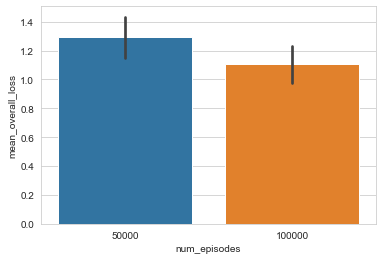

In [5]:
# sns.barplot(data=training_results_df, x="num_episodes", y="reward_variance");
# sns.barplot(data=training_results_df, x="num_episodes", y="max_reward");
# sns.barplot(data=training_results_df, x="num_episodes", y="mean_reward");
sns.barplot(data=training_results_df, x="num_episodes", y="mean_overall_loss");

# Notes: not sure, not very exciting

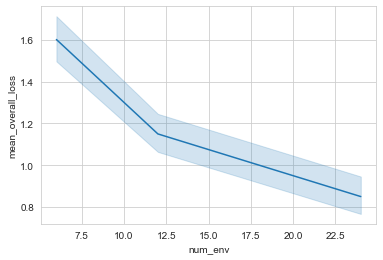

In [6]:
# sns.lineplot(data=training_results_df, x="num_env", y="reward_variance");
# sns.lineplot(data=training_results_df, x="num_env", y="max_reward");
# sns.lineplot(data=training_results_df, x="num_env", y="mean_reward");
sns.lineplot(data=training_results_df, x="num_env", y="mean_overall_loss");

# Notes: High num_envs = lowest overall loss, highest mean and max reward, but highest variance

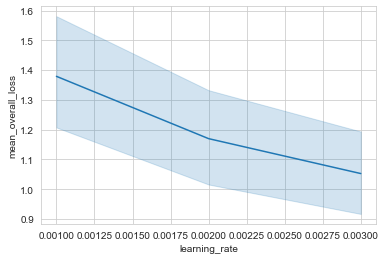

In [7]:
# sns.lineplot(data=training_results_df, x="learning_rate", y="reward_variance");
# sns.lineplot(data=training_results_df, x="learning_rate", y="max_reward");
# sns.lineplot(data=training_results_df, x="learning_rate", y="mean_reward");
sns.lineplot(data=training_results_df, x="learning_rate", y="mean_overall_loss");

# Note: Learning rate seems to have achieved a better loss when it was higher.

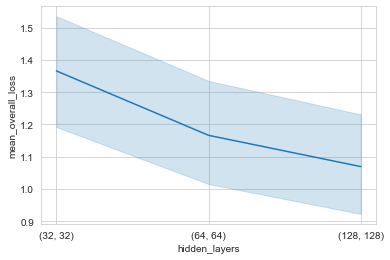

In [8]:
# sns.lineplot(data=training_results_df, x="hidden_layers", y="reward_variance");
# sns.lineplot(data=training_results_df, x="hidden_layers", y="max_reward");
# sns.lineplot(data=training_results_df, x="hidden_layers", y="mean_reward");
sns.lineplot(data=training_results_df, x="hidden_layers", y="mean_overall_loss");

# Note: (128, 128)  didn't seem to be a great return on reducing loss and increasing rewards or consistency of rewards <-- compare wall time

In [9]:
# Understand the min-max or ranges of each column
# Notes: which was the major contributor to mean overall loss? Critic loss. Is that a good thing or bad?
training_results_df.describe()

,index,wall_time,num_env,num_episodes,learning_rate,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.500000,254.146193,14.000000,75000.000000,0.002000,21.538889,254.466667,129.755833,47.412141,-0.060404,1.264170,-3.085134,1.200674
std,15.732133,101.020067,7.553582,25234.746934,0.000824,5.288200,55.314500,25.118622,11.103552,0.038657,0.410469,0.054599,0.379076
min,0.000000,120.040745,6.000000,50000.000000,0.001000,14.000000,139.200000,77.298000,26.496034,-0.121898,0.601505,-3.229935,0.580744
25%,13.250000,166.045827,6.000000,50000.000000,0.001000,17.725000,206.375000,109.437000,39.232841,-0.101660,0.955550,-3.122550,0.909378
50%,26.500000,239.612595,12.000000,75000.000000,0.002000,20.150000,253.100000,134.018000,46.647560,-0.056969,1.215598,-3.087203,1.148685
75%,39.750000,322.239726,24.000000,100000.000000,0.003000,24.975000,295.100000,151.260250,54.323945,-0.020609,1.587016,-3.042439,1.479692
max,53.000000,439.601978,24.000000,100000.000000,0.003000,37.900000,357.400000,177.633000,75.396052,0.004068,2.357820,-2.964169,2.244258


In [14]:
training_results_df.sort_values(by=["mean_overall_loss", "max_reward"], ascending=True).tail(20)
# training_results_df.sort_values(by=["mean_overall_loss", "mean_reward"], ascending=True).head(5)
training_results_df.sort_values(by=["max_reward"], ascending=False).head(5)

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
41,41,20210405-225734,233.457436,24,50000,0.002,"(128, 128)",19.8,357.4,168.576,75.396052,-0.013595,0.798346,-3.053405,0.781682
32,32,20210405-225734,323.056237,12,100000,0.002,"(128, 128)",29.7,349.5,141.940,53.722239,-0.057238,0.961843,-3.041728,0.901568
46,46,20210405-225734,435.312098,24,100000,0.001,"(64, 64)",21.0,348.7,163.916,58.631518,-0.019832,0.870527,-3.110452,0.847599
50,50,20210405-225734,433.807385,24,100000,0.002,"(128, 128)",28.8,348.3,161.838,59.924182,-0.020370,0.657104,-3.025075,0.633699
34,34,20210405-225734,325.225211,12,100000,0.003,"(64, 64)",27.5,337.5,138.399,53.402862,-0.061031,1.015881,-3.031302,0.951821


In [13]:
highest_mean_rewasrd_df = training_results_df.sort_values(by=["mean_reward"], ascending=False).head(5)
lowest_reward_variance_df = highest_mean_reward_df.sort_values(by=["reward_variance"], ascending=True)
highest_max_reward_df = lowest_reward_variance_df.sort_values(by=["max_reward"], ascending=False)
lowest_mean_overall_loss_df = highest_max_reward_df.sort_values(by=["mean_overall_loss"], ascending=True)
lowest_mean_overall_loss_df

,index,datetime,wall_time,num_env,num_episodes,learning_rate,hidden_layers,min_reward,max_reward,mean_reward,reward_variance,mean_actor_loss,mean_critic_loss,mean_entropy_loss,mean_overall_loss
52,52,20210405-225734,426.309445,24,100000,0.003,"(64, 64)",17.7,284.3,151.305,50.402941,-0.019678,0.639909,-3.021798,0.617209
50,50,20210405-225734,433.807385,24,100000,0.002,"(128, 128)",28.8,348.3,161.838,59.924182,-0.020370,0.657104,-3.025075,0.633699
49,49,20210405-225734,439.601978,24,100000,0.002,"(64, 64)",23.2,297.7,177.633,53.911520,-0.022093,0.705993,-3.044573,0.680842
44,44,20210405-225734,225.044123,24,50000,0.003,"(128, 128)",33.8,325.7,163.176,73.750592,-0.015266,0.748057,-3.033696,0.729755
43,43,20210405-225734,224.710153,24,50000,0.003,"(64, 64)",24.3,291.0,168.410,64.130695,-0.016216,0.767780,-3.066434,0.748507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,45,20210405-225734,419.668713,24,100000,0.001,"(32, 32)",14.2,256.2,144.394,53.608708,-0.016561,1.053736,-3.122166,1.034053
25,25,20210405-225734,169.212473,12,50000,0.003,"(64, 64)",29.1,293.4,151.372,60.918411,-0.051592,1.096208,-3.029678,1.041545
29,29,20210405-225734,324.422943,12,100000,0.001,"(128, 128)",21.8,257.2,142.047,47.147075,-0.060509,1.108949,-3.095934,1.045347
23,23,20210405-225734,164.434212,12,50000,0.002,"(128, 128)",30.9,233.1,141.172,47.804243,-0.055257,1.129275,-3.036484,1.070949


### interesting fact: convergences decreases after the 50th 000 episode.. why?

not really fair comparison with the 50000 based epidoe

single vs multiple worker

